In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget
#%matplotlib inline
%matplotlib notebook

from lightcone.plot_3d import Plot3d
from lightcone.animate import Animate
from lenstronomy.Util import util


In [2]:
from lightcone.Util.image_util import import_galaxy

kwargs_source, source_light_model_list = import_galaxy(galaxy_name='ngc1300', size=1)

In [3]:
n_z_bins = 100

num_pix = 400
delta_pix = 0.01


kwargs_model = {'lens_model_list': ['SIE', 'SIE'],
               'z_source': 1.5, 'lens_redshift_list': [0.5, 0.5],
               'source_light_model_list': source_light_model_list}

kwargs_lens = [{'theta_E': 1, 'e1': 0.1, 'e2': -0.1, 'center_x': 0, 'center_y': 0},
              {'theta_E': 0.2, 'e1': -0.1, 'e2': 0.1, 'center_x': 0.5, 'center_y': 0}]
#kwargs_source = [{'amp': 1, 'R_sersic': 0.2, 'n_sersic': 3, 'e1': 0.2, 'e2': -0.2, 'center_x': 0.1, 'center_y': 0}]

ra_grid, dec_grid, ra_at_xy_0, dec_at_xy_0, x_at_radec_0, y_at_radec_0, Mpix2coord, Mcoord2pix = util.make_grid_with_coordtransform(num_pix, delta_pix, center_ra=0, center_dec=0, left_lower=False,
                                   inverse=False)

kwargs_pixel_grid = {'nx': num_pix, 'ny': num_pix, 'ra_at_xy_0': ra_at_xy_0, 'dec_at_xy_0': dec_at_xy_0, 'transform_pix2angle': Mpix2coord}


plot3d = Plot3d(kwargs_model, kwargs_lens, kwargs_source, kwargs_pixel_grid, n_z_bins)

<IPython.core.display.Javascript object>


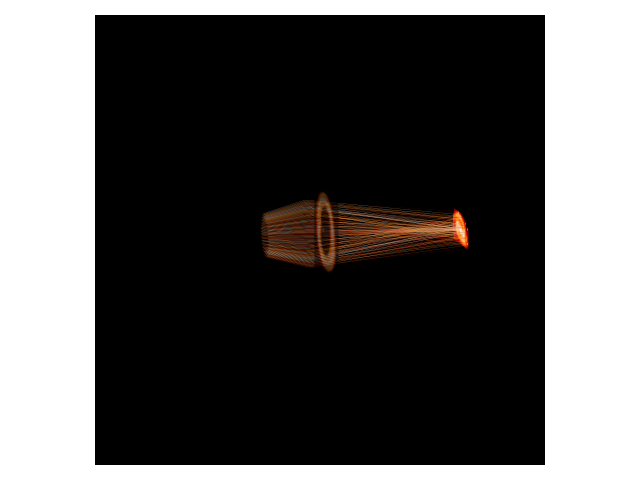

In [4]:
angle1 = 10 
angle2 = -100

fig = plt.figure()
plt.style.use('dark_background')
plot3d.plot3d(fig=fig, angle1=angle1, angle2=angle2, n_ray=20, plot_source=True, plot_lens=True, plot_rays=True, alpha_lens=0.05)
fig.tight_layout()
fig.show()

In [5]:
#folder_path = '/Users/sibirrer/Science/Projects/LensModelling/Educational/Movies/'
folder_path = 'C:\\Users\\zombi\\lightconeTests\\Movies\\'
movie_name = 'test'

kwargs_plot3d = {'kwargs_model': kwargs_model, 'kwargs_lens': kwargs_lens, 
                 'kwargs_source': kwargs_source, 'kwargs_pixel_grid': kwargs_pixel_grid, 
                 'n_z_bins': n_z_bins}

animate = Animate(movie_name=movie_name, folder_path=folder_path, **kwargs_plot3d)


angle1 = 10 
angle2 = -100

animate.ray_shooting(angle1, angle2)
animate.rotate_to_front(angle1, angle2, n_rotate=n_z_bins)
animate.mp4(fps=20)
#animate.gif()
animate.finish()

Loading ray shooting…: 100%|█████████████| 100/100 [00:44<00:00,  2.27it/s]


Ray shooting complete!


Loading rotate to front…: 100%|██████████| 100/100 [01:13<00:00,  1.37it/s]


Rotate to front complete!


In [6]:
from IPython.display import Video

movie_file = animate.movie_name()
#movie_file = 'C:\\Users\\zombi\\lightconeTests\\Movies\\test.mp4'
#folder_path + movie_name + ".mp4"

Video(movie_file, embed=True)